# INTRO

We will try to find out if we can establish a Credit Card Limit based on NON-INTRUSIVE information, it includes pieces of information that you can easily recollect without the help of credit card scores companies and without asking highly personal questions to our clients.

# IMPORTING LIBRARIES AND DATASET

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("credit.csv")
df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Gender     400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Ethnicity  400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [4]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


# EDA

### Ploting the correlation between Age and the Limit

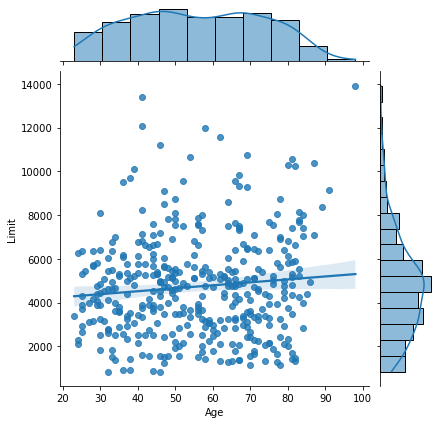

In [5]:
sns.jointplot("Age","Limit", data = df, kind = "reg")
plt.show()

### Plotting the correlation between Income and Limit by Gender

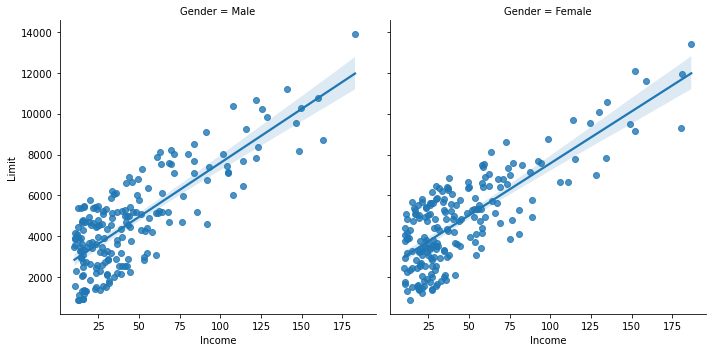

In [6]:
sns.lmplot("Income","Limit", data = df, col = "Gender")
plt.show()

### Plotting the correlation between the Rating and the Limit by Ehinicity and Students

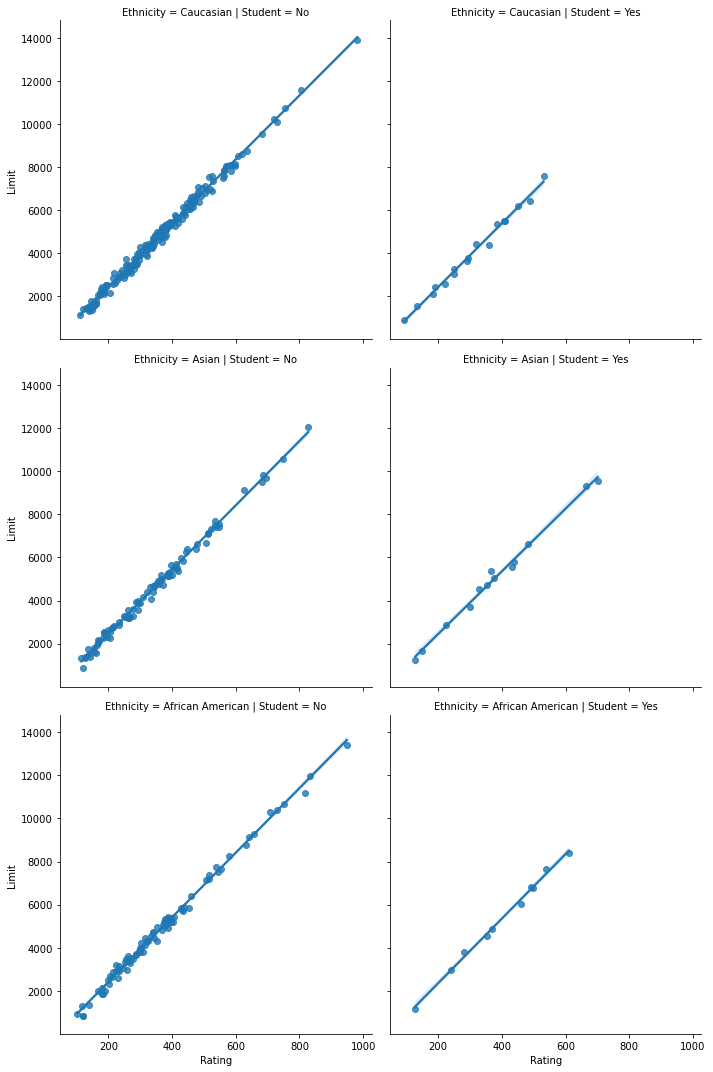

In [7]:
sns.lmplot("Rating","Limit", data = df, row = "Ethnicity", col = "Student")
plt.show()

### Plotting the distribution of Age

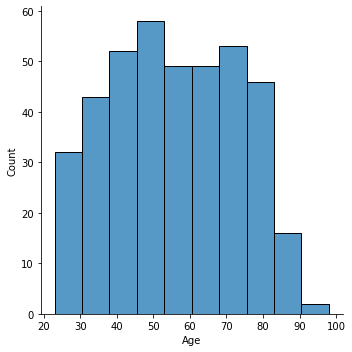

In [8]:
sns.displot(df["Age"])
plt.show()

### Plotting the distribution of Rating

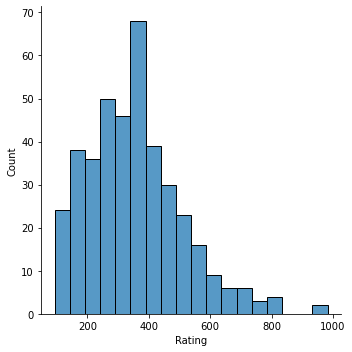

In [9]:
sns.displot(df["Rating"])
plt.show()

### Plotting the distribution of Limit

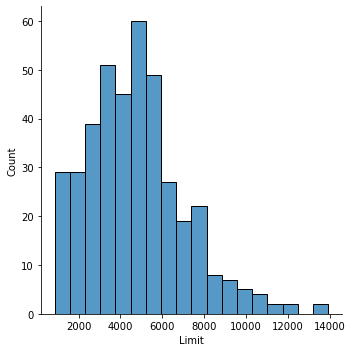

In [10]:
sns.displot(df["Limit"])
plt.show()

### Plotting the limit by Ethnicity and by Gender

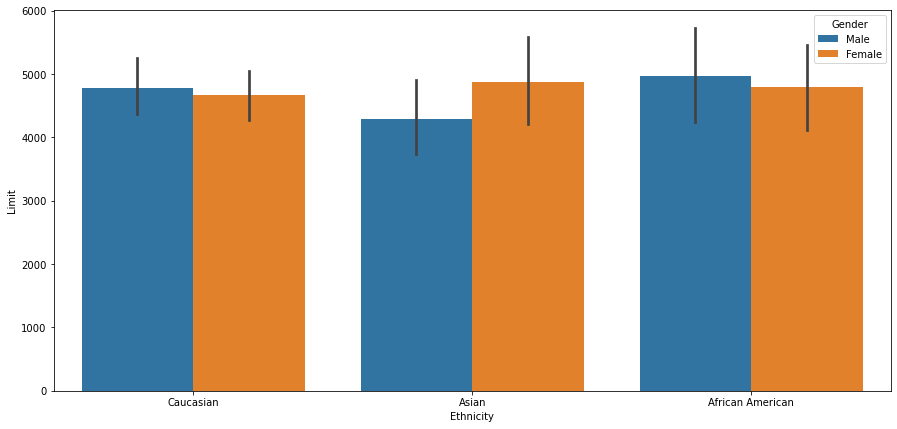

In [11]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x="Ethnicity", y="Limit", hue = "Gender")
plt.show()

### Plotting the limit by if it is a Studend and if it is Married

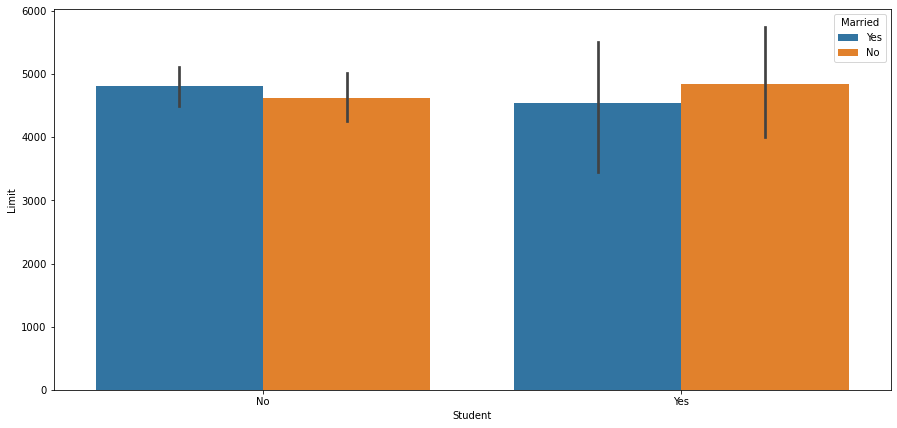

In [12]:
plt.figure(figsize = (15,7))
sns.barplot(data = df, x="Student", y="Limit", hue = "Married")
plt.show()

### Plotting the outliers of Rating by Ethnicity

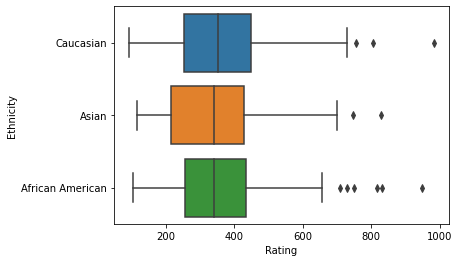

In [13]:
sns.boxplot( "Rating", "Ethnicity", data = df, orient='h')
plt.show()

### Plotting the outliers of Rating by if it is a Student

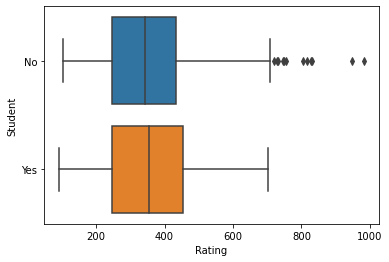

In [14]:
sns.boxplot( "Rating", "Student", data = df, orient='h')
plt.show()

### Plotting a correlation heatmap by all numerical variables

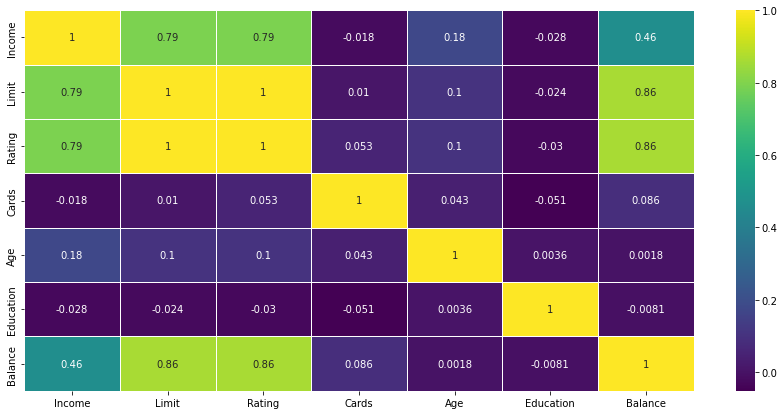

In [15]:
plt.figure(figsize = (15,7))
dfCorr = df.corr()
sns.heatmap(dfCorr, annot = True, cmap = "viridis", linewidth = 0.7)
plt.show()

# ELT

In [16]:
df.columns

Index(['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender',
       'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [17]:
df.head(1)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333


### Dropping all the columns that are too intrusive to ask or data provided by a score company

In [18]:
df.drop(['Income', 'Ethnicity', 'Education', 'Student', 'Rating'], axis = 1, inplace = True)


In [19]:
df.head()

,Limit,Cards,Age,Gender,Married,Balance
0,3606,2,34,Male,Yes,333
1,6645,3,82,Female,Yes,903
2,7075,4,71,Male,No,580
3,9504,3,36,Female,No,964
4,4897,2,68,Male,Yes,331


### Transforming the categorical variables into numerical values

In [20]:
full_df = pd.get_dummies(df, drop_first = True)
full_df.head()

,Limit,Cards,Age,Balance,Gender_Male,Married_Yes
0,3606,2,34,333,1,1
1,6645,3,82,903,0,1
2,7075,4,71,580,1,0
3,9504,3,36,964,0,0
4,4897,2,68,331,1,1


# MACHINE LEARNING

### Splitting the dataset into independent and dependent variables

In [21]:
X = full_df.drop("Limit", axis = 1)
y = full_df["Limit"]

### Splitting the dataset into Training and Testing

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)

### Training the Linear Regression Model

In [23]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression().fit(X_train,y_train)

lm_pred = lm.predict(X_test)

### Plotting the scatter plot with the predictions and the true values

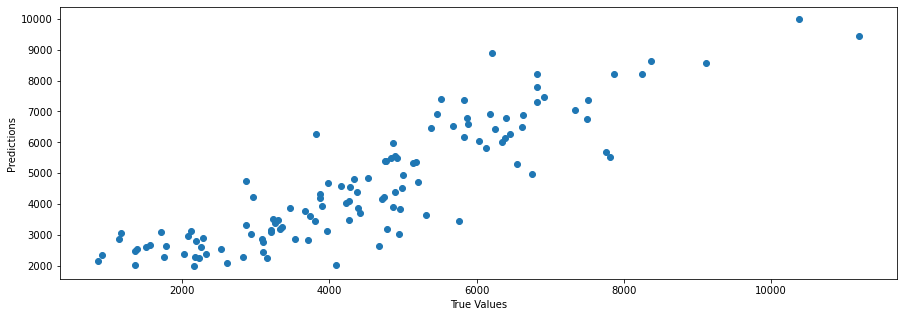

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(y_test, lm_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

### Getting the metrics of our model

In [25]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, lm_pred)))
print("The Variance Score is: ", round(100*(metrics.explained_variance_score(y_test, lm_pred)),2),"%")

RMSE:  963.2960880972565
The Variance Score is:  77.7 %


# CONCLUSION

With an accuracy of 78% we can set a credit card limit to our clientes without making uncomfortable information like: income, number of education years or ethnicity. And also without consulting scoring companies.

# SIMULATOR

In [26]:
sim_data = {"Cards" : 1, "Age": 25, "Balance": 2000, "Gender_Male":1, "Married_Yes": 0}
sim_data_df = pd.DataFrame(sim_data, index = [0])

lm_pred = lm.predict(sim_data_df)

print(f"Your credit card limit could be: {lm_pred[0]}")

Your credit card limit could be: 10822.472119264923
